Top 5 Counties (1930s):
Fulton: 318,587
Chatham: 105,431
Bibb: 77,042
Richmond: 72,990
Dekalb: 70,278


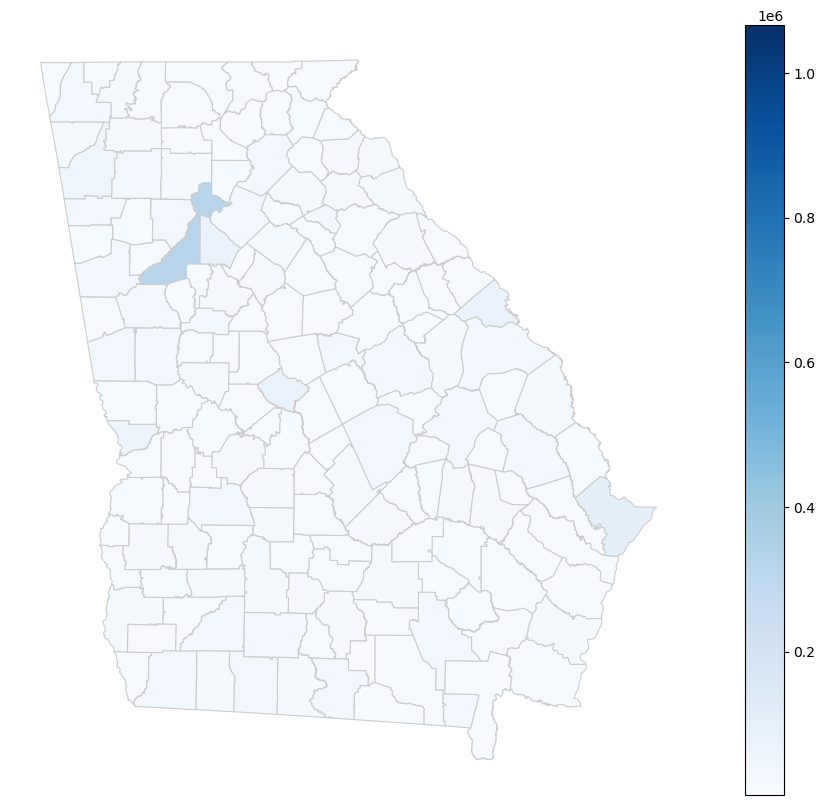

Top 5 Counties (1940s):
Fulton: 392,886
Chatham: 117,970
Dekalb: 86,942
Bibb: 83,783
Richmond: 81,863


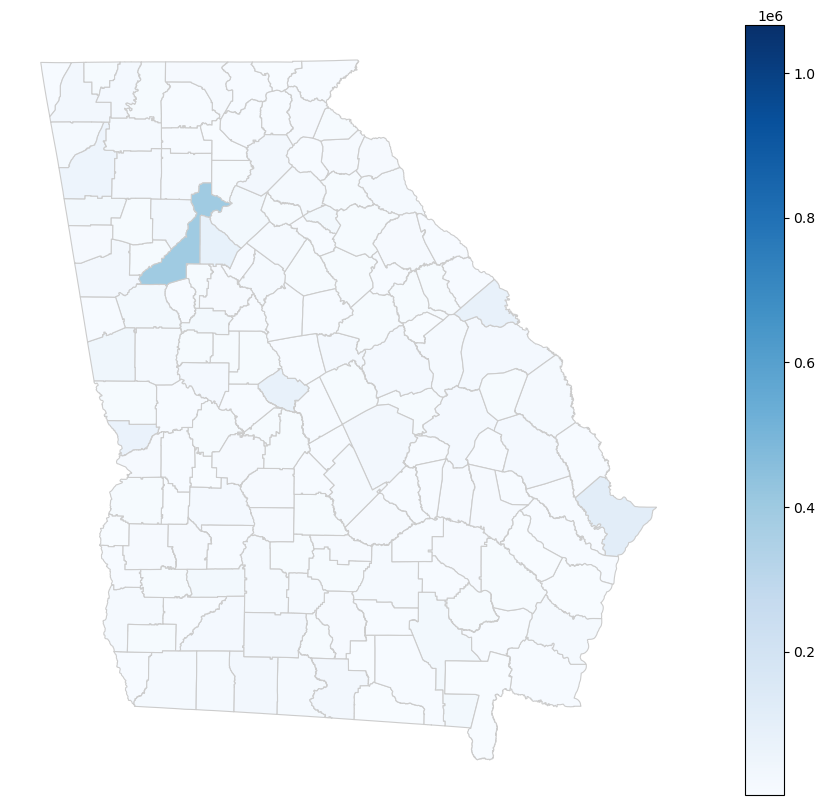

Top 5 Counties (1950s):
Fulton: 473,572
Chatham: 151,481
Dekalb: 136,395
Muscogee: 118,028
Bibb: 114,079


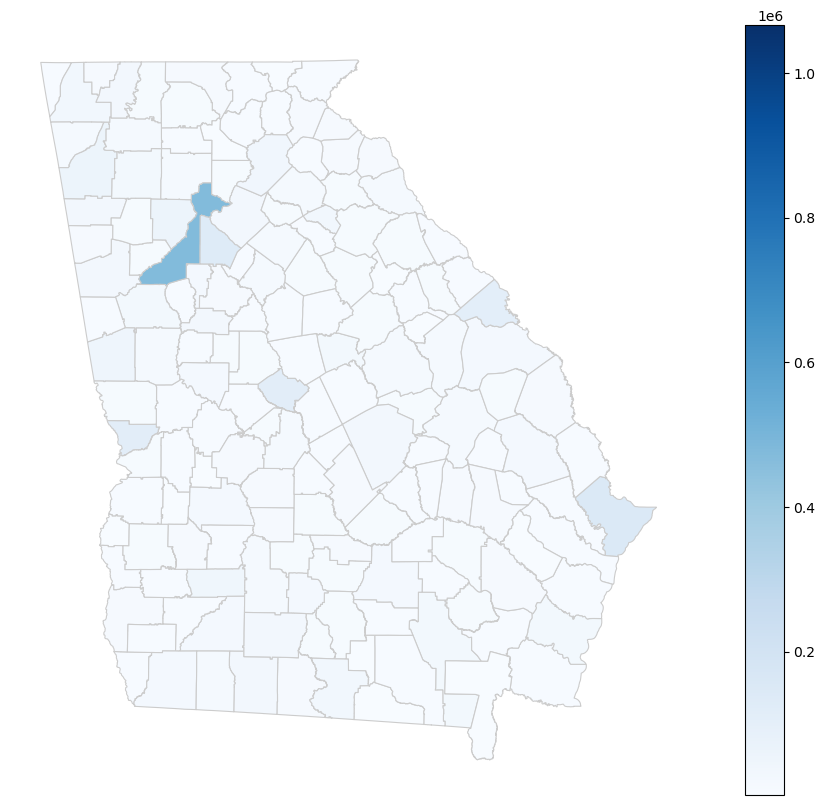

Top 5 Counties (1960s):
Fulton: 556,326
Dekalb: 256,782
Chatham: 188,299
Muscogee: 158,623
Bibb: 141,249


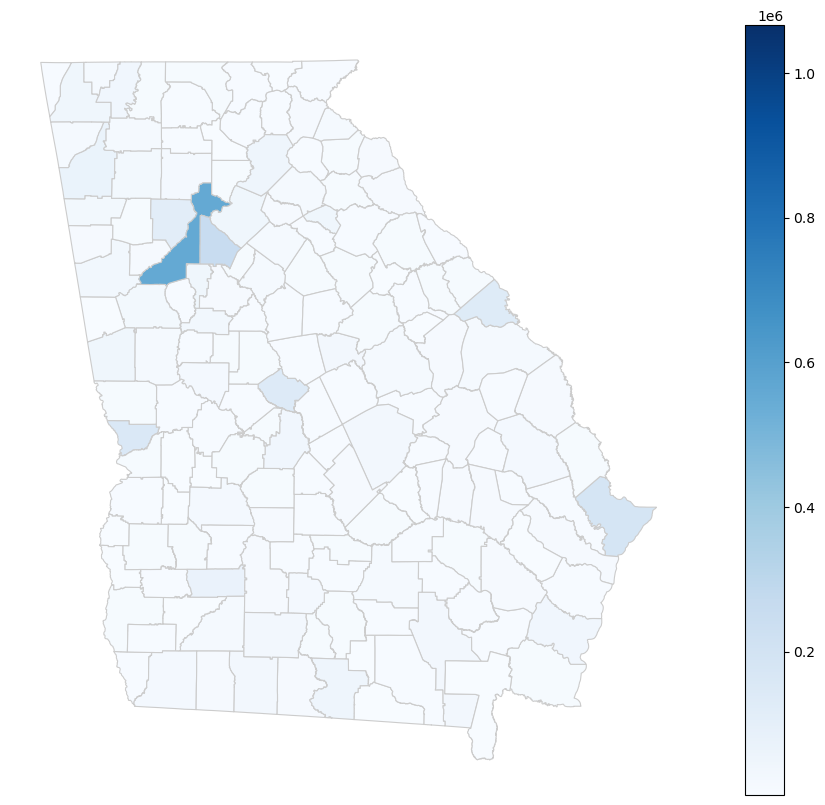

Top 5 Counties (1970s):
Fulton: 607,592
Dekalb: 415,387
Cobb: 196,793
Chatham: 187,767
Muscogee: 167,377


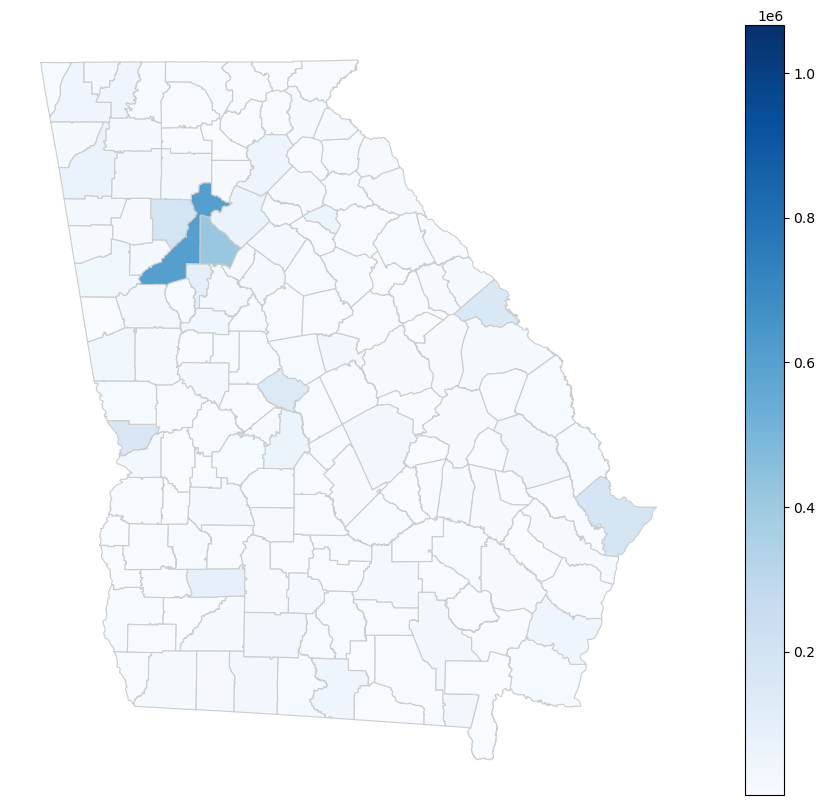

Top 5 Counties (1980s):
Fulton: 589,904
Dekalb: 483,024
Cobb: 297,718
Chatham: 202,226
Richmond: 181,629


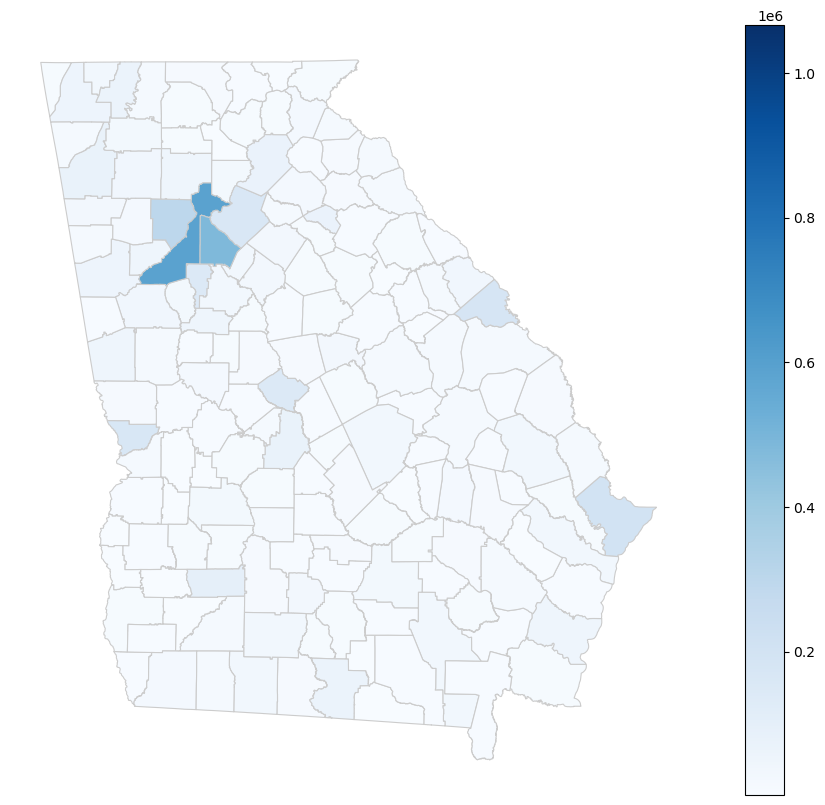

Top 5 Counties (1990s):
Fulton: 648,951
Dekalb: 545,837
Cobb: 447,745
Gwinnett: 352,910
Chatham: 216,935


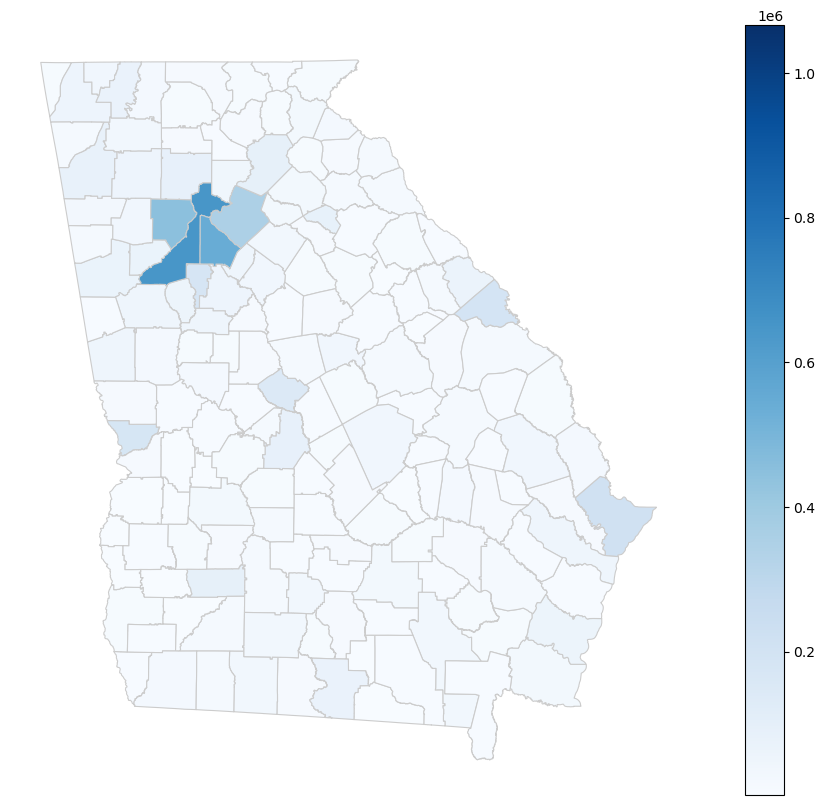

Top 5 Counties (2000s):
Fulton: 816,006
Dekalb: 665,865
Cobb: 607,751
Gwinnett: 588,448
Clayton: 236,517


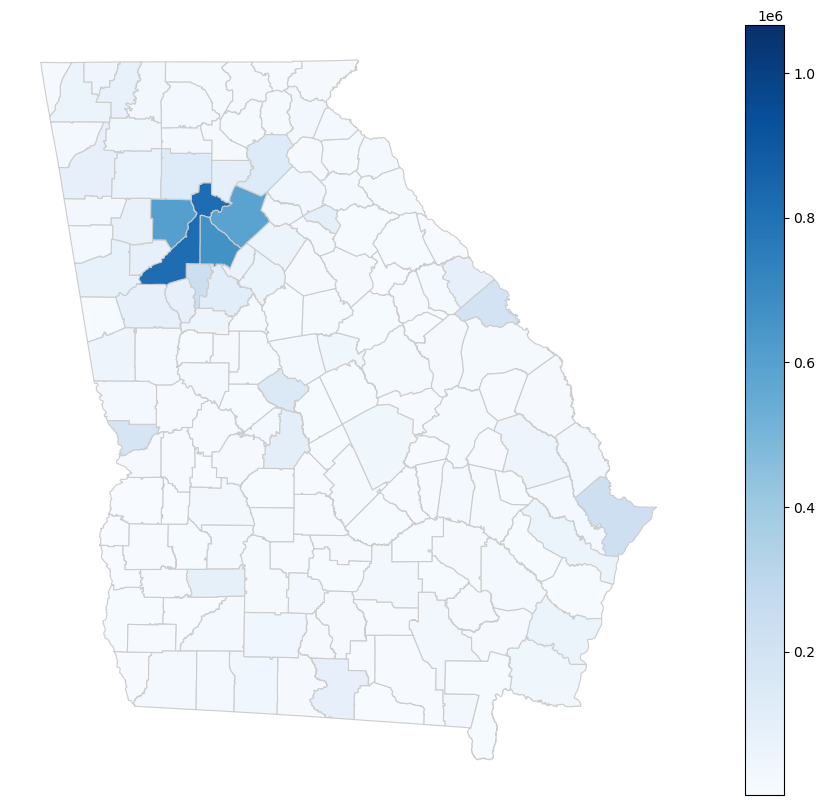

Top 5 Counties (2010s):
Fulton: 920,581
Gwinnett: 805,321
Dekalb: 691,893
Cobb: 688,078
Chatham: 265,128


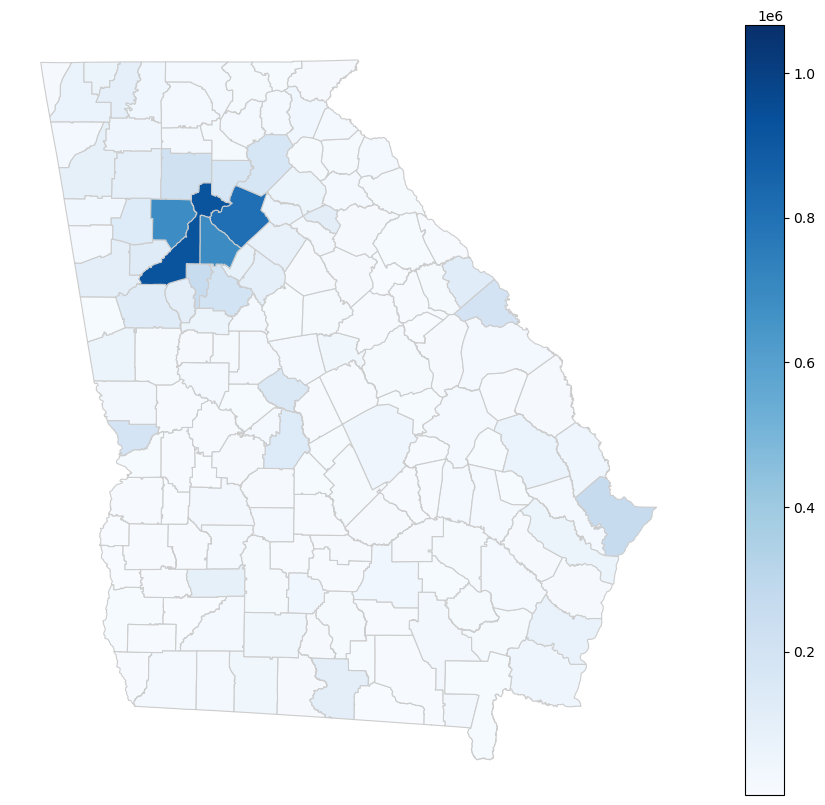

Top 5 Counties (2020s):
Fulton: 1,066,710
Gwinnett: 957,062
Cobb: 766,149
Dekalb: 764,382
Clayton: 297,595


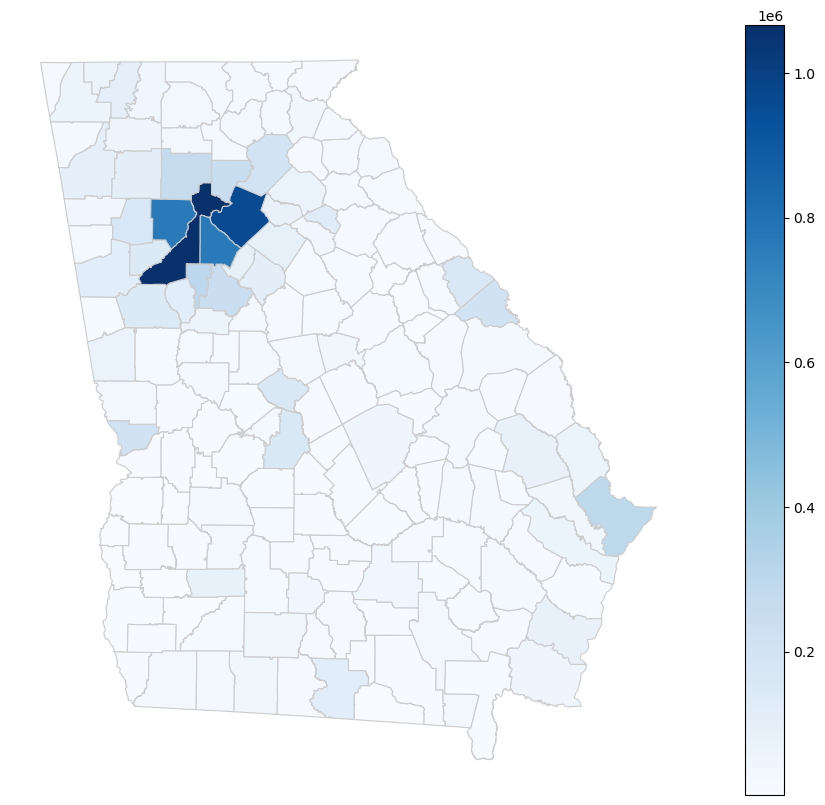

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Load your population data
df = pd.read_csv('georgia population.csv')
df.columns = df.columns.str.replace(' Population', '')

# Load the GeoDataFrame from the shapefile (contains only 'geometry')
shapefile_path = 'Counties_Georgia.shp'
gdf_shapefile = gpd.read_file(shapefile_path)

# Exclude the row for the whole state of Georgia and Campbell and Milton
df = df[df['County'] != 'GEORGIA']
df = df[(df['County'] != 'CAMPBELL') & (df['County'] != 'MILTON')]

# Select columns for analysis or visualization
pop_columns = [col for col in df.columns if 'Rank' not in col]

# Create a new column in the GeoDataFrame to store cleaned 'County' values
gdf_shapefile['County'] = ''

# Iterate over the rows in the DataFrame
for i, row in gdf_shapefile.iterrows():
    county = row['NAMELSAD10']
    
    # Remove trailing " County" and convert to all caps
    cleaned_county = county.replace(" County", "").upper()
    
    gdf_shapefile.at[i, 'County'] = cleaned_county
# Normalize all visualizations to be consistent with 2020
vmin = min(pd.to_numeric(df['2020'].str.replace(',', ''), errors='coerce').dropna())
vmax = max(pd.to_numeric(df['2020'].str.replace(',', ''), errors='coerce').dropna())
mynorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# Plot the choropleth map
decades = range(1930, 2030, 10)
for decade_to_visualize in decades:
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Filter the DataFrame for the chosen decade
    df_selected_decade = df[['County'] + [col for col in pop_columns if str(decade_to_visualize) in col]]
    
    # Melt the DataFrame to reshape it for plotting and handle commas in 'Population'  
    df_melted_selected_decade = pd.melt(df_selected_decade, id_vars=['County'], var_name='Decade', value_name='Population')
    df_melted_selected_decade['Population'] = pd.to_numeric(df_melted_selected_decade['Population'].str.replace(',', ''), errors='coerce').dropna()

    # Round the 'Population' values to integers
    df_melted_selected_decade['Population'] = df_melted_selected_decade['Population'].round().astype(int)
    
    # Merge GeoDataFrames based on the 'County' column
    gdf_merged = pd.merge(gdf_shapefile, df_melted_selected_decade, how='left', on='County')
    
    # Sort the DataFrame by population and select the top 5 counties
    top_5_counties = gdf_merged.sort_values(by='Population', ascending=False).head(5)
    print(f'Top 5 Counties ({decade_to_visualize}s):')
    for idx, (county, population) in top_5_counties[['County', 'Population']].iterrows():
        print(f'{county.title()}: {population:,}')
        
    gdf_merged.plot(column='Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm = mynorm)
    #ax.set_title(f'Population Distribution in Georgia Counties ({decade_to_visualize})')
    ax.set_axis_off()
    plt.show()
